# **Naive Bayes**

```
Alumno : Pfoccori Quispe Alex Harvey
Codigo: 193837
Proposito : Naive Bayes en la clasificacion de dureza
```

## **1. Librerias a utilizar**

In [1]:
# Librerias generales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

# Librerias para metricas
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Librerias para Naive Bayes
from sklearn.naive_bayes import GaussianNB

## **2. Leer datos**

In [2]:
datos = pd.read_csv('dureza.csv', sep=',')
datos.head(10)

,PC,PMg,PP,PS,Psi,Pti,PNb,PCr,PBr,Pal,PV,Pcu,PCl,Pni,Pmo,Pn,Dureza
0,0.243,1.27,0.015,0.0080,0.112,0.009,0.001,0.03,0.0004,0.039,0.003,0.03,0.0019,0.03,0.007,0.0058,293
1,0.231,1.26,0.015,0.0080,0.128,0.012,0.009,0.02,0.0005,0.028,0.003,0.01,0.0028,0.02,0.007,0.0035,293
2,0.220,1.26,0.017,0.0046,0.129,0.013,0.001,0.03,0.0004,0.044,0.004,0.03,0.0023,0.03,0.010,0.0048,293
3,0.230,1.26,0.014,0.0040,0.130,0.013,0.002,0.01,0.0003,0.027,0.001,0.01,0.0022,0.01,0.003,0.0064,293
4,0.232,1.26,0.012,0.0073,0.135,0.011,0.001,0.02,0.0005,0.045,0.003,0.02,0.0026,0.02,0.010,0.0065,293
5,0.232,1.27,0.013,0.0035,0.150,0.014,0.002,0.01,0.0003,0.029,0.002,0.01,0.0032,0.01,0.001,0.0060,293
6,0.232,1.27,0.013,0.0035,0.150,0.014,0.002,0.01,0.0003,0.029,0.002,0.01,0.0032,0.01,0.001,0.0060,293
7,0.230,1.26,0.014,0.0040,0.130,0.013,0.002,0.01,0.0003,0.027,0.001,0.01,0.0022,0.01,0.003,0.0064,293
8,0.227,1.28,0.023,0.0072,0.103,0.012,0.005,0.04,0.0004,0.033,0.008,0.02,0.0022,0.04,0.015,0.0046,293
9,0.239,1.25,0.018,0.0080,0.109,0.014,0.004,0.05,0.0005,0.043,0.006,0.02,0.0035,0.04,0.015,0.0046,293


## **3. Descripcion de datos**

In [4]:
# Estadisticos basicos por atributos
print(datos.describe().transpose())

        count        mean        std       min         25%        50%  \
PC      140.0    0.234143   0.009624    0.2200    0.227750    0.23300   
PMg     140.0    1.256429   0.023293    1.2100    1.240000    1.26000   
PP      140.0    0.016029   0.002972    0.0090    0.014000    0.01600   
PS      140.0    0.006006   0.001556    0.0010    0.005000    0.00580   
Psi     140.0    0.125921   0.014223    0.1000    0.117000    0.12400   
Pti     140.0    0.012493   0.001664    0.0090    0.011000    0.01300   
PNb     140.0    0.004036   0.007187    0.0010    0.001000    0.00300   
PCr     140.0    0.026143   0.008187    0.0100    0.020000    0.03000   
PBr     140.0    0.000376   0.000111    0.0001    0.000300    0.00040   
Pal     140.0    0.037750   0.005646    0.0240    0.035000    0.03800   
PV      140.0    0.004443   0.004764    0.0010    0.003000    0.00400   
Pcu     140.0    0.024214   0.014044    0.0100    0.020000    0.02000   
PCl     140.0    0.002499   0.000536    0.0012    0

## **4. Histograma**

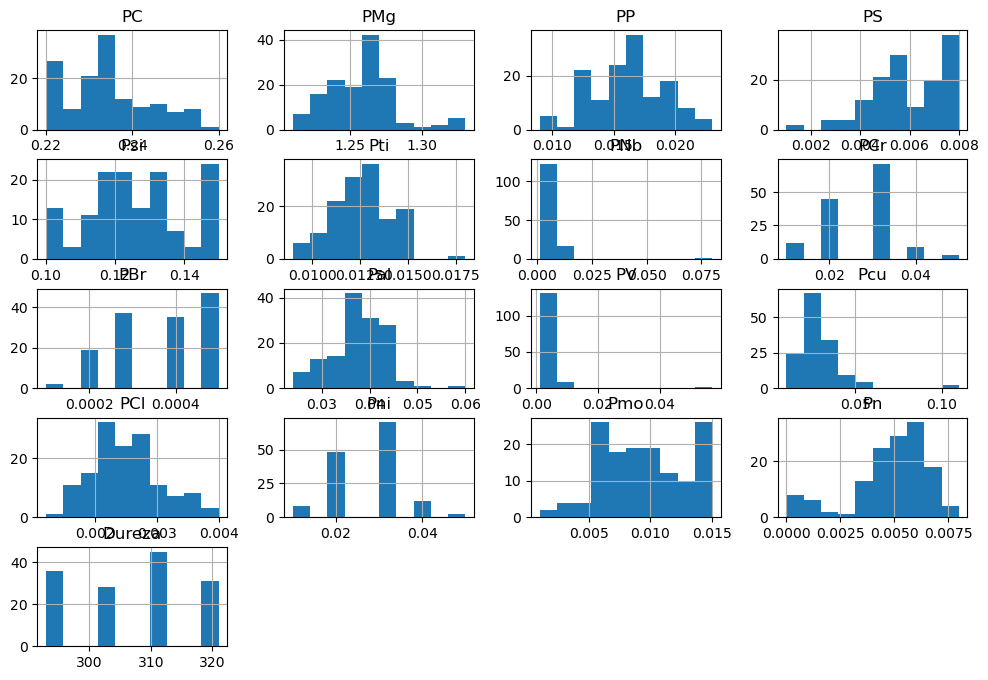

In [5]:
datos.hist(figsize=(12,8))
plt.show()

## **5. Distribucion de clases**

In [6]:
# Numero de registros por especie de iris
print(datos.groupby('Dureza').size())

Dureza
293    36
302    28
311    45
321    31
dtype: int64


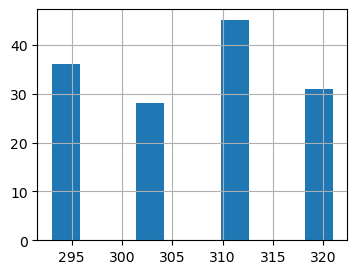

In [7]:
plt.figure(figsize=(4,3))
datos['Dureza'].hist()
plt.show()

## **6. Separacion de datos, para entrenamiento y test**

In [65]:
x = datos.drop(['Dureza'], axis=1)
y = datos['Dureza']

# Separa datos en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=27, train_size=0.7)
x_train.head()

,PC,PMg,PP,PS,Psi,Pti,PNb,PCr,PBr,Pal,PV,Pcu,PCl,Pni,Pmo,Pn
128,0.234,1.24,0.019,0.0058,0.100,0.011,0.001,0.04,0.0005,0.044,0.004,0.02,0.0017,0.03,0.010,0.0048
54,0.244,1.26,0.015,0.0038,0.146,0.013,0.010,0.02,0.0005,0.039,0.002,0.02,0.0021,0.02,0.006,0.0060
49,0.230,1.23,0.016,0.0079,0.130,0.010,0.001,0.03,0.0002,0.040,0.002,0.04,0.0020,0.02,0.009,0.0056
134,0.230,1.26,0.015,0.0050,0.118,0.011,0.001,0.03,0.0005,0.035,0.004,0.04,0.0027,0.03,0.008,0.0000
138,0.254,1.28,0.015,0.0044,0.150,0.015,0.004,0.03,0.0004,0.042,0.005,0.02,0.0019,0.03,0.013,0.0044


## **7. Entrenamiento de Naive Bayes**

In [66]:
# Crear objeto NaiveBayes
NaiveBayes = GaussianNB()

# Entrenamiento
NaiveBayes.fit(x_train, y_train)

GaussianNB()

In [67]:
# Exactitud del entrenamiento
NaiveBayes.score(x_test, y_test)

0.42857142857142855

## **8. Prueba(test) del modelo**

In [68]:
# Datos de prueba
x_test.head()

,PC,PMg,PP,PS,Psi,Pti,PNb,PCr,PBr,Pal,PV,Pcu,PCl,Pni,Pmo,Pn
107,0.234,1.24,0.018,0.0080,0.118,0.012,0.001,0.03,0.0003,0.036,0.003,0.03,0.0016,0.02,0.009,0.0064
123,0.249,1.31,0.018,0.0065,0.132,0.015,0.003,0.02,0.0002,0.034,0.006,0.01,0.0027,0.02,0.006,0.0053
9,0.239,1.25,0.018,0.0080,0.109,0.014,0.004,0.05,0.0005,0.043,0.006,0.02,0.0035,0.04,0.015,0.0046
70,0.238,1.25,0.013,0.0049,0.117,0.011,0.014,0.02,0.0003,0.045,0.004,0.02,0.0019,0.02,0.007,0.0000
125,0.238,1.27,0.014,0.0080,0.146,0.009,0.001,0.03,0.0002,0.060,0.002,0.03,0.0027,0.03,0.011,0.0060


In [69]:
# Prediccion con los datos de test
pred = NaiveBayes.predict(x_test)
print(pred)

[311 293 311 293 302 293 311 321 321 321 293 311 311 321 311 321 311 311
 311 311 293 302 311 293 293 311 311 293 321 321 311 311 311 302 321 311
 302 311 293 321 302 321]


## **9. Matriz de confusion y metricas**

In [70]:
# Dataframe con las etiqueta reales (y_test) y las generadas pro el modelo (pred)

# Crear una lista de tuplas con los valores de y_test y pred
resultados = list(zip(y_test, pred))

# Crear el Dataframe a partir de la lista de tuplas
df = pd.DataFrame(resultados, columns=['y_test', 'pred'])
df

,y_test,pred
0,311,311
1,321,293
2,293,311
3,311,293
4,321,302
5,302,293
6,311,311
7,302,321
8,321,321
9,302,321


In [71]:
# Generar la matriz de confusion
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)

print('Matriz de Confusion')
print(MatrizConfusion)
print('Exactitud = ', Exactitud)

Matriz de Confusion
[[ 3  3  2  2]
 [ 1  1  3  2]
 [ 4  0 10  2]
 [ 1  1  3  4]]
Exactitud =  0.42857142857142855


## **10. Prediccion**

In [72]:
x_train.columns

Index(['PC', 'PMg', 'PP', 'PS', 'Psi', 'Pti', 'PNb', 'PCr', 'PBr', 'Pal', 'PV',
       'Pcu', 'PCl', 'Pni', 'Pmo', 'Pn'],
      dtype='object')

In [73]:
# Crear un data set con un nuevo registro; cuidando la estructura del data set de entrenamiento
nuevo = pd.DataFrame(data=[[0.25, 1.24, 0.017, 0.003, 0.14, 0.013, 0.002, 0.01, 0.0006, 0.027, 0.001, 0.01, 0.0022, 0.01, 0.003, 0.0064]],
                     columns=['PC', 'PMg', 'PP', 'PS', 'Psi', 'Pti', 'PNb', 'PCr', 'PBr', 'Pal', 'PV',
                            'Pcu', 'PCl', 'Pni', 'Pmo', 'Pn'])

pred = NaiveBayes.predict(nuevo)
pred

array([293], dtype=int64)

In [74]:
# Prediccion directa
pred = NaiveBayes.predict([[0.25, 1.24, 0.017, 0.003, 0.14, 0.013, 0.002, 0.01, 0.0006, 0.027, 0.001, 0.01, 0.0022, 0.01, 0.003, 0.0064]])
pred

c:\Users\HARVEY\anaconda3\envs\machine-learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([293], dtype=int64)